In [9]:
import sys
sys.path.append("../") 
import nozzleFactory
import refProp
import numSolvers
import nozzleSolver
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time
import importlib
import scipy.optimize
from UseCases.pressurePlots import loadsolver
from nozzleSolver import NozzleSolver

In [2]:
pd.set_option('display.expand_frame_repr', False)
%matplotlib notebook

In [3]:
    nozzle = nozzleFactory.ConicConic(1.0, 2.905,0.2215, 1.4116, 0.345 )
    nozzle.setFriction( 1.0e-2 )
    print(nozzle)
    Nint = 250
    fluid = "BUTANE"
    nsolver = nozzleSolver.NozzleSolver(nozzle, fluid, Nint)

Axis symmetric Nozzle with :
inlet cross section 3.141592653589793 cm^2 
throat cross section 0.15413360416858587 cm^2 
throat diameter 0.44300000000000006 cm 
outlet cross section 0.3739280655935249 cm^2 
outlet diameter 0.6899999999999998 cm 
Length 4.316599999999999 cm 
The throat is at 2.905 cm from the inlet 
Friction coefficient 0.01 



In [10]:
pin = 2139 # KPa
fluid= "BUTANE"
RP = refProp.setup(fluid)
Tin =  273.15 + 114.5 # 114.5 Celsius see Schlemminger Tabelle 3
[Din, hin] =  refProp.getDh_from_TP(RP, Tin, pin)
solver = NozzleSolver(nozzle, "BUTANE", Nint)
Nint = solver.nint
nozzle = solver.nozzle
ARatio = nozzle.Ain / nozzle.At
mdevx = nozzle.L / Nint / ARatio


iteration 1 dev : 0.850832 x val : 1.92426
iteration 2 dev : 0.349319 x val : 2.59975
iteration 3 dev : 0.047964 x val : 3.35257
iteration 4 dev : 0.006882 x val : 3.41478
iteration 5 dev : -0.000248 x val : 3.41486
Newton Raphson has converged in 5 iterations
critical speed calculation finished in 20.805 sec
critical inlet velocity is 3.4148554830480884 m/s


<IPython.core.display.Javascript object>


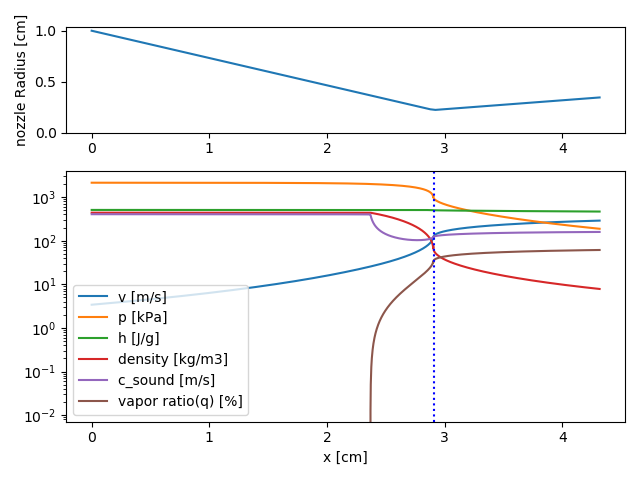

In [12]:
vin_crit = nsolver.calcCriticalSpeed(pin, hin, v0=1.0, maxdev=mdevx)
res = solver.solveNplot( vin_crit, pin , hin)

In [13]:
massflow = vin_crit * res['d'].values[0] * solver.nozzle.Ain * 1e-4 # kg/s
print('mass flow rate {} [kg/s]'.format(massflow))

mass flow rate 0.47172583557061354 [kg/s]


:( The Schlemminger paper writes 0.127 kg/sec

Inlet properties:

In [14]:
res.head(1)

,x,v,p,h,d,c,mach,quality
0,0.0,3.414855,2139.0,508.59259,439.711132,405.481862,0.008422,0.0


Outlet properties

In [16]:
res.tail(1)

,x,v,p,h,d,c,mach,quality
1830,4.3166,289.468181,188.164782,466.790633,7.846195,159.009582,1.820445,0.61375
